# Imports and Data

In [1]:
import numpy as np 
import networkx as nx 
import scipy as sc 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import defenses.rw
import defenses.spectral_add
import attack.sample as prop 
import attack.util 
import defenses.addDel
import attack.distance_vec as dis1 

In [3]:
def shift(G, shift=1):
    mapping = {}
    for i in G.nodes:
        mapping[i] = i-shift
    return nx.relabel_nodes(G, mapping)

def scorer(n, answers):
    score = 0 
    for i in answers:
        if(answers[i] == i):
            score += 1
    return score / n

def copyToGraph(G, H):
    for (u,v) in H.edges():
        G.add_edge(u,v)
    return G

def to_map(lst):
    mp = {}
    for (a,b) in lst:
        mp[a] = b 
    return mp 

# Defenses 

In [4]:
G_original = nx.read_edgelist("data/email-Eu-core.txt", nodetype=int)

In [5]:
re_idx = [i for i in range(len(G_original))]
np.random.shuffle(re_idx)
labels = {i : re_idx[i] for i in range(len(G_original))}
G_shuffle = nx.relabel_nodes(G_original, labels)

In [6]:
G_rw = defenses.rw.Anon(G_original, [5,40])
Gs_proposed = []
for i in range(5):
    name = "proposedmethod/result_" + str(i+1) + ".txt"
    G = nx.empty_graph(1005)
    G = copyToGraph(G,shift(nx.read_edgelist(name, nodetype=int)) )
    nx.write_edgelist(G, "result_"+str(i)+".txt", data=False)
    Gs_proposed.append( G)

In [7]:
G_rw = defenses.rw.Anon(G_original, [2,100]) #2 hops 100 tried per hop

In [8]:
G_adddel = defenses.addDel.addDel(G_original)

In [9]:
G_spec = defenses.spectral_add.Anon(G_original, [1000])

1005
1005


# Utilities 

In [10]:
def degree_dist(G,H):
    seq1 = [G.degree(i) for i in G]
    seq2 = [H.degree(i) for i in G]
    was = sc.stats.wasserstein_distance(seq1, seq2)
    ks = sc.stats.ks_2samp(seq1, seq2)
    return was, ks

def eig(G,H): 
    res1 = nx.eigenvector_centrality(G)
    res2 = nx.eigenvector_centrality(H)
    seq1 = [res1[i] for i in G]
    seq2 = [res2[i] for i in H]
    was = sc.stats.wasserstein_distance(seq1, seq2)
    ks = sc.stats.ks_2samp(seq1, seq2)
    return was, ks

def closenss(G,H):
    res1 = nx.closeness_centrality(G)
    res2 = nx.closeness_centrality(H)
    seq1 = [res1[i] for i in G]
    seq2 = [res2[i] for i in H]
    was = sc.stats.wasserstein_distance(seq1, seq2)
    ks = sc.stats.ks_2samp(seq1, seq2)
    return was, ks

def between(G,H):
    res1 = nx.betweenness_centrality(G)
    res2 = nx.betweenness_centrality(H)
    seq1 = [res1[i] for i in G]
    seq2 = [res2[i] for i in H]
    was = sc.stats.wasserstein_distance(seq1, seq2)
    ks = sc.stats.ks_2samp(seq1, seq2)
    return was, ks

In [11]:
print(between(G_original, Gs_proposed[0])) #k=1
print(between(G_original, Gs_proposed[1])) #k=2
print(between(G_original, Gs_proposed[2]))
print(between(G_original, Gs_proposed[3]))
print(between(G_original, Gs_proposed[4])) #k=5

(0.0006002526187760863, KstestResult(statistic=0.16716417910447762, pvalue=1.130289857756131e-12, statistic_location=0.00021684587410890417, statistic_sign=-1))
(0.0004455855655264691, KstestResult(statistic=0.11442786069651742, pvalue=3.770369496769968e-06, statistic_location=0.00011371490872274195, statistic_sign=-1))
(0.0004246579581761035, KstestResult(statistic=0.10746268656716418, pvalue=1.7922402554992486e-05, statistic_location=0.00023394005301053138, statistic_sign=-1))
(0.0007450025589503347, KstestResult(statistic=0.1263681592039801, pvalue=2.0699906583306883e-07, statistic_location=0.000390946999007276, statistic_sign=-1))
(0.0005153225467609462, KstestResult(statistic=0.12139303482587065, pvalue=7.185916361058893e-07, statistic_location=0.0004260281141896873, statistic_sign=-1))


In [12]:
print(closenss(G_original, Gs_proposed[0]))
print(closenss(G_original, Gs_proposed[1]))
print(closenss(G_original, Gs_proposed[2]))
print(closenss(G_original, Gs_proposed[3]))
print(closenss(G_original, Gs_proposed[4]))

(0.03136785799984929, KstestResult(statistic=0.1681592039800995, pvalue=8.058369769521991e-13, statistic_location=0.40915060138592546, statistic_sign=-1))
(0.021534250715533283, KstestResult(statistic=0.15223880597014924, pvalue=1.4153305648164836e-10, statistic_location=0.3588412780367575, statistic_sign=1))
(0.03081649114261062, KstestResult(statistic=0.2218905472636816, pvalue=4.39034418883969e-22, statistic_location=0.3921913805815698, statistic_sign=1))
(0.0419441025291519, KstestResult(statistic=0.32338308457711445, pvalue=7.080246422020173e-47, statistic_location=0.4229144690385068, statistic_sign=1))
(0.03391986247160898, KstestResult(statistic=0.2557213930348259, pvalue=2.845729235669352e-29, statistic_location=0.3921913805815698, statistic_sign=1))


In [13]:
print(eig(G_original, Gs_proposed[0]))
print(eig(G_original, Gs_proposed[1]))
print(eig(G_original, Gs_proposed[2]))
print(eig(G_original, Gs_proposed[3]))
print(eig(G_original, Gs_proposed[4]))

(0.004958659531703251, KstestResult(statistic=0.23383084577114427, pvalue=1.6837276082713664e-24, statistic_location=0.0044377967635613235, statistic_sign=-1))
(0.005982354238109239, KstestResult(statistic=0.24577114427860697, pvalue=4.769371704589657e-27, statistic_location=0.006719629816956542, statistic_sign=-1))
(0.0017268484347391405, KstestResult(statistic=0.041791044776119404, pvalue=0.34408498537205134, statistic_location=0.006769741002611777, statistic_sign=-1))
(0.0014163467039389863, KstestResult(statistic=0.07761194029850746, pvalue=0.004683748573161993, statistic_location=0.0013378747815336561, statistic_sign=1))
(0.0025178872216035943, KstestResult(statistic=0.09651741293532339, pvalue=0.00017012893201228177, statistic_location=0.00304081862934812, statistic_sign=1))


In [14]:
print(degree_dist(G_original, Gs_proposed[0]))
print(degree_dist(G_original, Gs_proposed[1]))
print(degree_dist(G_original, Gs_proposed[2]))
print(degree_dist(G_original, Gs_proposed[3]))
print(degree_dist(G_original, Gs_proposed[4]))

(9.79900497512438, KstestResult(statistic=0.23383084577114427, pvalue=1.6837276082713664e-24, statistic_location=18, statistic_sign=-1))
(10.610945273631842, KstestResult(statistic=0.09253731343283582, pvalue=0.000363093919350327, statistic_location=88, statistic_sign=1))
(9.39303482587065, KstestResult(statistic=0.09054726368159204, pvalue=0.0005240961511648864, statistic_location=63, statistic_sign=1))
(4.837810945273636, KstestResult(statistic=0.04975124378109453, pvalue=0.16616548551573346, statistic_location=18, statistic_sign=-1))
(4.314427860696519, KstestResult(statistic=0.04975124378109453, pvalue=0.16616548551573346, statistic_location=19, statistic_sign=-1))


# make comparative plots of data
# results for attacks against protected and unprotected data 

# Distance Vector 

## Unprotected 

In [15]:
dis_original = dis1.distance_vector_method(G_original, G_original)
dis_original = to_map(dis_original)

In [16]:
print(scorer(len(G_original), dis_original))

1.0


## Protected

In [17]:
dis_rw = dis1.distance_vector_method(G_original, G_rw[0])
dis_rw = to_map(dis_rw)

In [18]:
print(scorer(len(G_original), dis_rw))

0.0626865671641791


In [19]:
dis_adddel = dis1.distance_vector_method(G_original, G_adddel) 
dis_adddel = to_map(dis_adddel)

In [20]:
print(scorer(len(G_original), dis_adddel))

1.0


In [21]:
dis_spec = dis1.distance_vector_method(G_original, G_spec[0])
dis_spec = to_map(dis_spec)

In [22]:
print(scorer(len(G_original), dis_spec))

0.6676616915422886


In [23]:
for G in Gs_proposed:
    G_answers = dis1.distance_vector_method(G_original, G)
    G_answers = to_map(G_answers)
    print(scorer(len(G_original), G_answers))

0.03980099502487562
0.042786069651741296
0.04079601990049751
0.041791044776119404
0.04079601990049751


# Propagation Method 
## Unprotected

In [24]:
rw_original = prop.deAnon(G_original, G_original, {i : i for i in range(40)})

In [25]:
scorer(len(G_original), rw_original)

0.6746268656716418

## Protected

In [26]:
rw_answers = prop.deAnon(G_original, G_rw[0], {i : i for i in range(40)})

In [27]:
scorer(len(G_original), rw_answers)

0.03980099502487562

In [28]:
prop.deAnon(G_original, G_spec[0], {i : i for i in range(40)})
print(scorer(len(G_original), rw_answers))

0.03980099502487562


In [29]:
for G in Gs_proposed:
    G_answers = prop.deAnon(G_original, G, {i : i for i in range(40)})
    print(scorer(len(G_original), G_answers))

0.03980099502487562
0.03980099502487562
0.03980099502487562
0.03980099502487562
0.03980099502487562


# Alpha role sim

## Unprotected

In [90]:
answers0 = pd.read_csv("attack/alpha/result/alpha-rolesim++_pair.log", header=None, sep=" ")


In [91]:
score = 0 
for i in range(len(answers0)):
    score += answers0.iloc[i][0]  == answers0.iloc[i][1]
score/len(answers0)

0.8427860696517413

## Protected

In [89]:
nx.number_of_edges(G_original)

16706

In [ ]:
nx.write_edgelist(G_original, "rw.txt", data= False)

In [60]:
## G_proposed 1

answers1 = pd.read_csv("attack/alpha/result/alpha-rolesim++_pair.log", header=None, sep=" ")
score = 0 
for i in range(len(answers1)):
    score += (answers1.iloc[i][0]  == answers1.iloc[i][1])
score

1

In [64]:
## G_proposed 2
answers2 = pd.read_csv("attack/alpha/result/alpha-rolesim++_pair.log", header=None, sep=" ")
score = 0 
for i in range(len(answers1)):
    score += int(answers2.iloc[i][0]  == answers2.iloc[i][1])
score

1

In [79]:
# G_proposed 3 
answers3 = pd.read_csv("attack/alpha/result/alpha-rolesim++_pair.log", header=None, sep=" ")
score = 0 
for i in range(len(answers1)):
    score += int(answers3.iloc[i][0]  == answers3.iloc[i][1])
score

0

In [77]:
# G_proposed 4 
answers4 = pd.read_csv("attack/alpha/result/alpha-rolesim++_pair.log", header=None, sep=" ")
score = 0 
for i in range(len(answers1)):
    score += answers4.iloc[i][0]  == answers4.iloc[i][1]
score

1

In [83]:
# G_proposed 5
answers4 = pd.read_csv("attack/alpha/result/alpha-rolesim++_pair.log", header=None, sep=" ")
score = 0 
for i in range(len(answers1)):
    score += answers4.iloc[i][0]  == answers4.iloc[i][1]
score

2

In [87]:
## Random walk 
answersrw = pd.read_csv("attack/alpha/result/alpha-rolesim++_pair.log", header=None, sep=" ")
score = 0 
for i in range(len(answers1)):
    score += int(answersrw.iloc[i][0]  == answersrw.iloc[i][1])
score

1

# Plotting 

In [30]:
def degSeq(G):
    seq1 = pd.DataFrame([d[1] for d in nx.degree(G)], columns=["0"])
    seq1 = seq1.sort_values(by='0',ignore_index= True)
    return seq1 

def eigSeq(G):
    seq1 = pd.DataFrame([d[1] for d in nx.eigenvector_centrality(G).items() ], columns=["0"])
    seq1 = seq1.sort_values(by='0',ignore_index= True)

    return  seq1 

def closenssSeq(G):
    seq1 = pd.DataFrame( [d[1] for d in nx.closeness_centrality(G).items()], columns=["0"])
    seq1 = seq1.sort_values(by='0',ignore_index= True)

    return seq1 

def betweenSeq(G):
    seq1 = pd.DataFrame([d[1] for d in nx.betweenness_centrality(G).items()], columns=["0"])
    seq1 = seq1.sort_values(by='0',ignore_index= True)

    return  seq1 


In [31]:
G_original_deg = degSeq(G_original)
G_original_eig = eigSeq(G_original)
G_original_close = closenssSeq(G_original)
G_original_between = betweenSeq(G_original)

G_rw_deg = degSeq(G_rw[0])
G_rw_eig = eigSeq(G_rw[0])
G_rw_close = closenssSeq(G_rw[0])
G_rw_between = betweenSeq(G_rw[0])


In [32]:
G_rw_deg

,0
0,0
1,0
2,0
3,0
4,0
...,...
1000,137
1001,146
1002,146
1003,147


In [33]:
deg_frame = pd.DataFrame(np.zeros((1005, 7)), columns=["Orginal", "RW", "prop1", "prop2", "prop3", "prop4", "prop5"])
eig_frame = pd.DataFrame(np.zeros((1005, 7)), columns=["Orginal", "RW", "prop1", "prop2", "prop3", "prop4", "prop5"])
bet_frame = pd.DataFrame(np.zeros((1005, 7)), columns=["Orginal", "RW", "prop1", "prop2", "prop3", "prop4", "prop5"])
closenss_frame = pd.DataFrame(np.zeros((1005, 7)), columns=["Orginal", "RW", "prop1", "prop2", "prop3", "prop4", "prop5"])


In [34]:
deg_frame["Orginal"] = G_original_deg
deg_frame["RW"] = G_rw_deg

for i in range(5):
    deg_frame["prop" + str(i+1)] = degSeq(Gs_proposed[i])

In [35]:
eig_frame["Orginal"] = G_original_eig
eig_frame["RW"] = G_rw_eig
for i in range(5):
    eig_frame["prop" + str(i+1)] = eigSeq(Gs_proposed[i])

In [36]:
bet_frame["Orginal"] = G_original_between
bet_frame["RW"] = G_rw_between
for i in range(5):
    bet_frame["prop" + str(i+1)] = betweenSeq(Gs_proposed[i])

In [37]:
closenss_frame["Orginal"] = G_original_close
closenss_frame["RW"] = G_rw_close
for i in range(5):
    closenss_frame["prop" + str(i+1)] = closenssSeq(Gs_proposed[i])

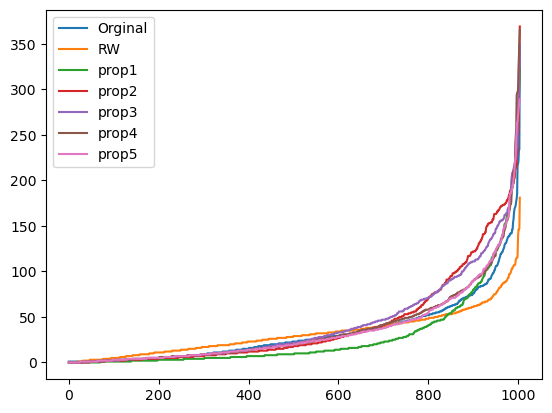

In [38]:
%matplotlib inline
deg_frame.plot()
plt.show()

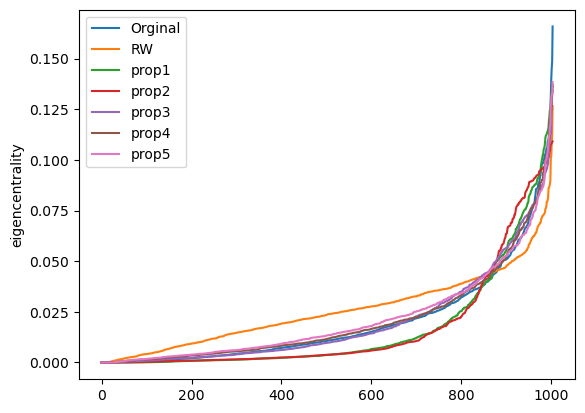

In [46]:
eig_frame.plot(ylabel="eigencentrality")
plt.show()

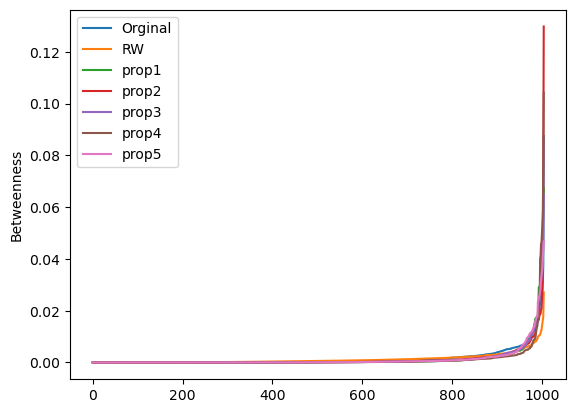

In [45]:
bet_frame.plot(ylabel="Betweenness")
plt.show()

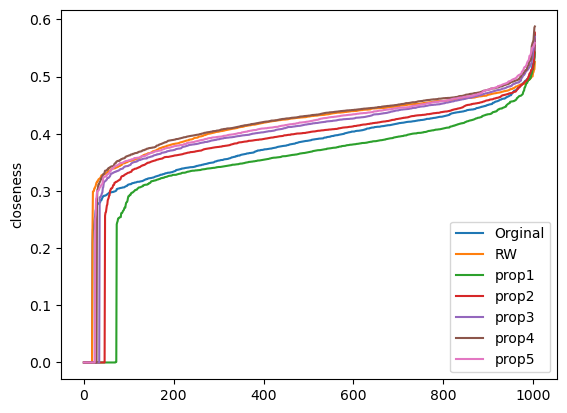

In [42]:
closenss_frame.plot(ylabel="closeness")
plt.show()